# The Hodgkin–Huxley model of the action potential
## Giuseppe Brancato -- 2019
"""Calculate HH model 
"""

In [24]:
%clear
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.integrate import odeint

%matplotlib inline

mpl.rcParams['figure.dpi']=100
#mpl.rcParams['savefig.dpi']=120
mpl.rcParams['figure.titlesize']=20
mpl.rcParams['axes.facecolor']='white'        
mpl.rcParams['lines.linewidth']=2.0
mpl.rcParams['axes.linewidth']=2.0
mpl.rcParams['xtick.major.pad']=6
mpl.rcParams['ytick.major.pad']=6
mpl.rcParams['xtick.labelsize']=14
mpl.rcParams['ytick.labelsize']=14
mpl.rcParams['axes.titlesize']=18
mpl.rcParams['axes.labelsize']=18
mpl.rcParams['axes.grid']='True'
mpl.rcParams['axes.axisbelow']='line'
mpl.rcParams['legend.fontsize']=12


### HH model from Hodgkin and Huxley, 1952d

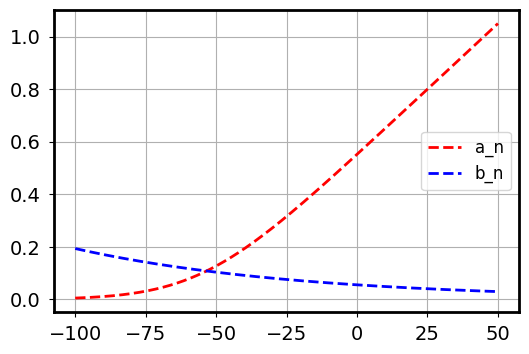

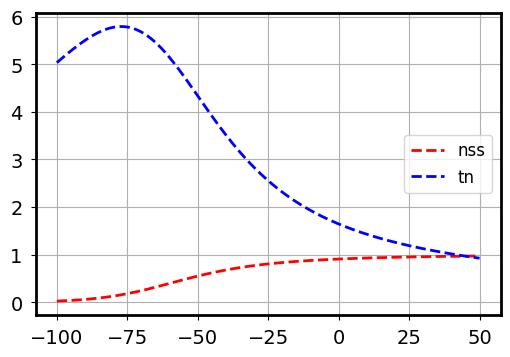

In [3]:

V = np.linspace(-100,50,1000)

# Define a_n(V) and b_n(V) parameters for K ion channel

a_n = 0.010 * (V + 55) / (1 - np.exp(-(V + 55) / 10) )
b_n = 0.125 * np.exp(-(V + 65) / 80) 

nss = a_n / (a_n + b_n)
tn  = 1 / (a_n + b_n)

plt.plot(V, a_n, 'r--', linewidth=2.0, label="a_n")
plt.plot(V, b_n, 'b--', linewidth=2.0, label="b_n")
plt.legend(loc='center right')
plt.show()

plt.plot(V, nss, 'r--', linewidth=2.0, label="nss")
plt.plot(V, tn, 'b--', linewidth=2.0, label="tn")
plt.legend(loc='center right')
plt.show()

### K channel

In [4]:
def ode_channel(t, n, p):
    a = p[0]
    b = p[1]
    dndt = a * (1 - n) - b * n
    return dndt

In [5]:
# Conductance
Vrest  = -65 # mV
Vstep  = Vrest + 26  # mV
EK     = -77  # mV
gK_max = 36   # mS cm^-2

# Define a_n(V) and b_n(V) parameters for K ion channel

V = Vrest
a_n = 0.010 * (V + 55) / (1 - np.exp(-(V + 55) / 10) )
b_n = 0.125 * np.exp(-(V + 65) / 80) 
n0  = a_n / (a_n + b_n)

# Pack up the parameters and initial conditions:
V = Vstep
a_n = 0.010 * (V + 55) / (1 - np.exp(-(V + 55) / 10) )
b_n = 0.125 * np.exp(-(V + 65) / 80)
nss = a_n / (a_n + b_n)
pK  = [a_n, b_n]

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

# time in ms
t = np.linspace(0,15,1000)

nK = odeint(ode_channel, n0, t, args=(pK,), tfirst=True)

nK4 = (nK*nK*nK*nK)
gK = gK_max * nK4
IK = gK * (V - EK) 

print(a_n, b_n) 
print("gK_max: ", gK_max, "\nn_last: ", nK[-1], nK4[-1], "\nn_inf: ", nss, nss**4.0, 
      "\ngK_last: ", gK[-1], "\ngK_inf: ", gK_max*nss**4.0)


0.2004752561634965 0.09031591920525903
gK_max:  36 
n_last:  [0.68467182] [0.21975047] 
n_inf:  0.6894131361079703 0.2259010330004366 
gK_last:  [7.91101692] 
gK_inf:  8.132437188015718


## Plot

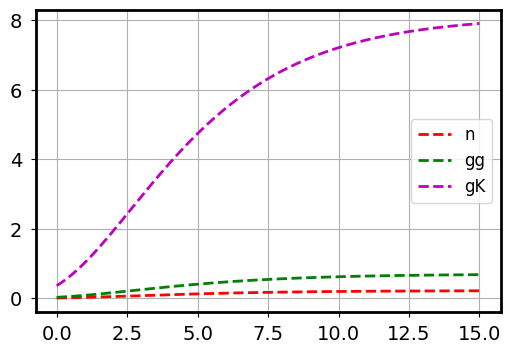

In [6]:
# fig = plt.figure(figsize=(8,6))
plt.plot(t, nK4, 'r--', linewidth=2.0, label="n")

gg = (nK4 / nK4[-1]) *  ((gK[-1] / gK_max)**(1.0/4.0))
plt.plot(t, gg, 'g--', linewidth=2.0, label="gg")

plt.plot(t, gK, 'm--', linewidth=2.0, label="gK")
#plt.plot(t, C[:,3], 'b-', linewidth=2.0, label="P")
plt.legend(loc='center right')
plt.show()


### Na channel

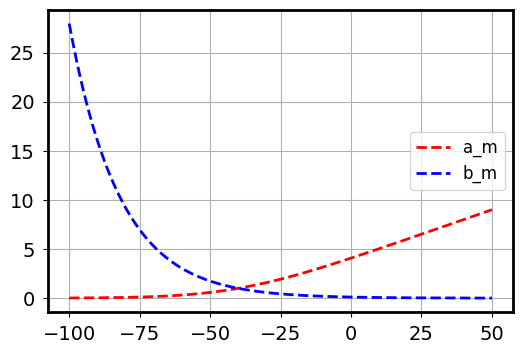

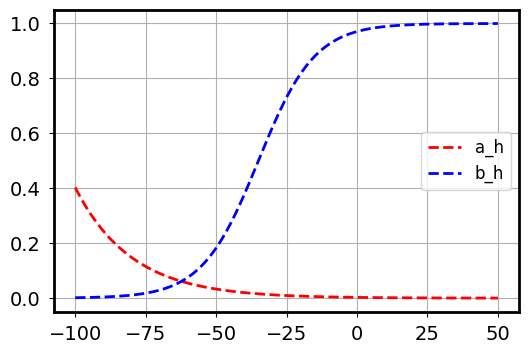

In [7]:

V = np.linspace(-100,50,1000)


# Define a_n(V) and b_n(V) parameters for K ion channel

a_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
b_m = 4.0 * np.exp(-(V + 65) / 18) 

a_h = 0.07 * np.exp(-(V + 65) / 20)
b_h = 1.0 / (1.0 + np.exp(-(V + 35) / 10))


plt.plot(V, a_m, 'r--', linewidth=2.0, label="a_m")
plt.plot(V, b_m, 'b--', linewidth=2.0, label="b_m")
plt.legend(loc='center right')
plt.show()

plt.plot(V, a_h, 'r--', linewidth=2.0, label="a_h")
plt.plot(V, b_h, 'b--', linewidth=2.0, label="b_h")
plt.legend(loc='center right')
plt.show()


In [8]:
# Conductance
Vrest   = -65 # mV
Vstep   = Vrest + 65  # mV
ENa     = 50  # mV
gNa_max = 120 # mS cm^-2

# Define a_n(V) and b_n(V) parameters for K ion channel
V = Vrest
a_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
b_m = 4.0 * np.exp(-(V + 65) / 18) 
m0 = a_m / (a_m + b_m)
a_h = 0.07 * np.exp(-(V + 65) / 20)
b_h = 1.0 / (1.0 + np.exp(-(V + 35) / 10)) 
h0 = a_h / (a_h + b_h)

# Pack up the parameters and initial conditions:
V = Vstep
a_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
b_m = 4.0 * np.exp(-(V + 65) / 18) 
a_h = 0.07 * np.exp(-(V + 65) / 20)
b_h = 1.0 / (1.0 + np.exp(-(V + 35) / 10)) 
pm = [a_m, b_m]
ph = [a_h, b_h]

# time in ms
t = np.linspace(0,10,100)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

mNa = odeint(ode_channel, m0, t, args=(pm,), tfirst=True)
hNa = odeint(ode_channel, h0, t, args=(ph,), tfirst=True)

gNa = gNa_max * hNa * (mNa**3.0)
INa = gNa * (V - ENa)

print(a_m, b_m)


4.074629441455096 0.10808722380483625


## Plot Na channel

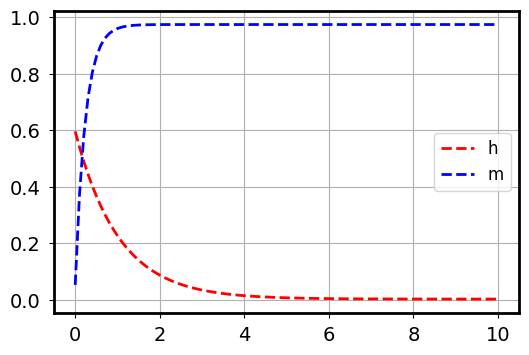

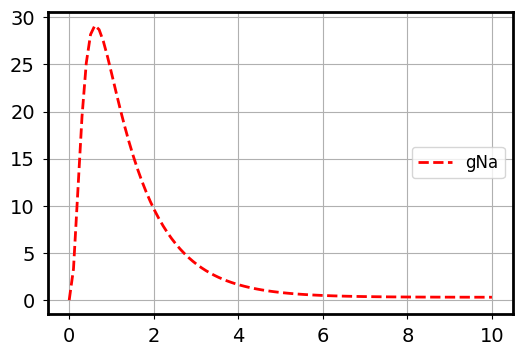

In [9]:
plt.plot(t, hNa, 'r--', linewidth=2.0, label="h")
plt.plot(t, mNa, 'b--', linewidth=2.0, label="m")
plt.legend(loc='center right')
plt.show()

# fig = plt.figure(figsize=(8,6))
plt.plot(t, gNa, 'r--', linewidth=2.0, label="gNa")

#gg = (nK4 / nK4[-1]) *  ((gK[-1] / gK_max)**(1.0/4.0))
# plt.plot(t, INa, 'g--', linewidth=2.0, label="INa")

#plt.plot(t, C[:,2], 'm--', linewidth=2.0, label="ES")
#plt.plot(t, C[:,3], 'b-', linewidth=2.0, label="P")
plt.legend(loc='center right')
plt.show()


## Action potential: HH model

Based on HH model parameters. Choose an injected current intensity and time interval:
Iinj    = 0.0    # 10^-3 mA cm^-2
tini_inj= 5      # ms
tend_inj= 10     # ms


In [10]:
def ode_action_potential(t, C, p):
    V = C[0]
    m = C[1]
    h = C[2]
    n = C[3]

    Iinjected = 0.0
    if p[1] <= t <= p[2]:
        Iinjected = p[0]
    
    ENa     = 50     # mV
    gNa_max = 120    # mS cm^-2
    EK      = -77    # mV
    gK_max  = 36     # mS cm^-2
    EL      = -54.4  # mV
    gL_max  = 0.3    # mS cm^-2
    Cm      = 1.0    # microF cm^-2

    a_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
    b_m = 4.0 * np.exp(-(V + 65) / 18)
    a_h = 0.07 * np.exp(-(V + 65) / 20)
    b_h = 1.0 / (1.0 + np.exp(-(V + 35) / 10)) 
    a_n = 0.010 * (V + 55) / (1 - np.exp(-(V + 55) / 10) )
    b_n = 0.125 * np.exp(-(V + 65) / 80) 

    dmdt = a_m * (1 - m) - b_m * m
    dhdt = a_h * (1 - h) - b_h * h
    dndt = a_n * (1 - n) - b_n * n
    
    gNa = gNa_max * h * (m**3.0)
    INa = gNa * (V - ENa)
    gK = gK_max * n**4.0
    IK = gK * (V - EK)
    IL = gL_max * (V - EL)
    
    dVdt = (-1.0 / Cm) * (INa + IK + IL + Iinjected)
    
    return (dVdt, dmdt, dhdt, dndt)



In [11]:
# Conductance
Vrest   = -65    # mV
Vstep   = Vrest + 0  # mV
ENa     = 50     # mV
gNa_max = 120    # mS cm^-2
EK      = -77    # mV
gK_max  = 36     # mS cm^-2
EL      = -54.4  # mV
gL_max  = 0.3    # mS cm^-2
Cm      = 1.0    # microF cm^-2
Iinj    = -10.83  # 10^-3 mA cm^-2
tini_inj= 10      # ms
tend_inj= 100     # ms

# Define a_n(V) and b_n(V) parameters for K ion channel
V = Vrest
a_m = 0.1 * (V + 40) / (1 - np.exp(-(V + 40) / 10))
b_m = 4.0 * np.exp(-(V + 65) / 18) 
m0 = a_m / (a_m + b_m)
a_h = 0.07 * np.exp(-(V + 65) / 20)
b_h = 1.0 / (1.0 + np.exp(-(V + 35) / 10)) 
h0 = a_h / (a_h + b_h)
a_n = 0.010 * (V + 55) / (1 - np.exp(-(V + 55) / 10) )
b_n = 0.125 * np.exp(-(V + 65) / 80) 
n0  = a_n / (a_n + b_n)

# Pack up the parameters and initial conditions:
#     S, E, ES, P
C0 = [Vstep, m0, h0, n0]
K  = [Iinj, tini_inj, tend_inj]

# time in ms
t = np.linspace(0,100,1000)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

C = odeint(ode_action_potential, C0, t, args=(K,), tfirst=True)

V = C[:,0]  # mV
gNa = gNa_max * C[:,2] * (C[:,1]**3.0) # mS cm^-2
gK = gK_max * C[:,3]**4.0              # mS cm^-2
INa = gNa * (V - ENa) * (10**-3.0)  # mA cm^-2
IK = gK * (V - EK) * (10**-3.0)     # mA cm^-2
IL = gL_max * (V - EL) * (10**-3.0) # mA cm^-2

## Plot Action Potential

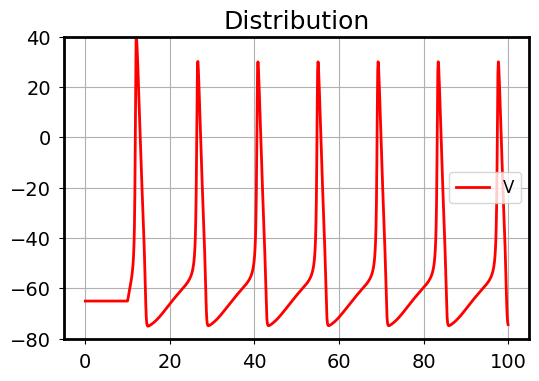

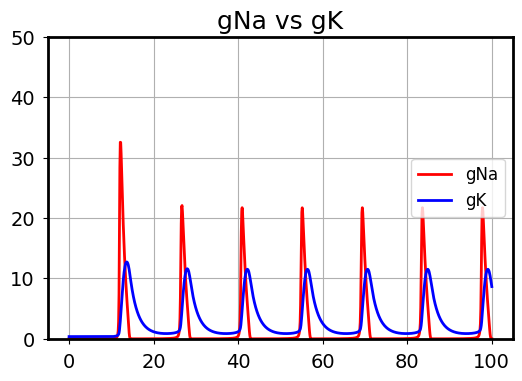

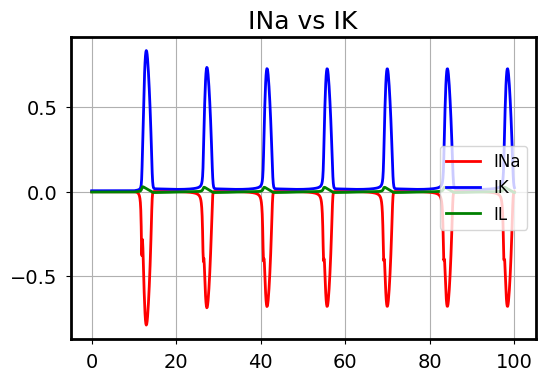

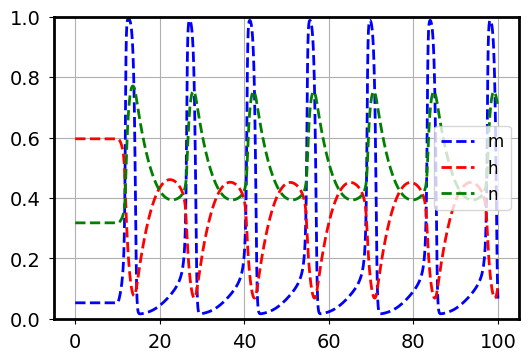

In [12]:
fig = plt.figure()
axes = fig.add_subplot(111)
plt.title('Distribution')

plt.plot(t, V, 'r-', linewidth=2.0, label="V")
#plt.plot(t, C10[:,0], 'r-', linewidth=2.0, label="V")
#plt.plot(t, C20[:,0], 'r-', linewidth=2.0, label="V")
#axes.set_xlim([6.6,9.3])
axes.set_ylim([-80,40])

plt.legend(loc='center right')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(111)
plt.title('gNa vs gK')
plt.plot(t, gNa, 'r-', linewidth=2.0, label="gNa")
plt.plot(t, gK, 'b-', linewidth=2.0, label="gK")
#axes.set_xlim([6.6,9.3])
axes.set_ylim([0,50])
plt.legend(loc='center right')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(111)
plt.title('INa vs IK')
plt.plot(t, INa, 'r-', linewidth=2.0, label="INa")
plt.plot(t, IK, 'b-', linewidth=2.0, label="IK")
plt.plot(t, IL, 'g-', linewidth=2.0, label="IL")
#axes.set_xlim([6.6,9.3])
#axes.set_ylim([-50,50])
plt.legend(loc='center right')
plt.show()

fig = plt.figure()
# fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(111)
plt.plot(t, C[:,1], 'b--', linewidth=2.0, label="m")
plt.plot(t, C[:,2], 'r--', linewidth=2.0, label="h")
plt.plot(t, C[:,3], 'g--', linewidth=2.0, label="n")
axes.set_ylim([0,1])
#gg = (nK4 / nK4[-1]) *  ((gK[-1] / gK_max)**(1.0/4.0))
# plt.plot(t, INa, 'g--', linewidth=2.0, label="INa")

#plt.plot(t, C[:,2], 'm--', linewidth=2.0, label="ES")
#plt.plot(t, C[:,3], 'b-', linewidth=2.0, label="P")
plt.legend(loc='center right')
plt.show()

## Action potential: HH model + A-type current

In [13]:
def ode_action_potential_A(t, C, p):
    V = C[0]
    m = C[1]
    h = C[2]
    n = C[3]
    a = C[4]
    b = C[5]
    
    Iinjected = 0.0
    if p[1] <= t <= p[2]:
        Iinjected = p[0]
    
    ENa     = 50.0     # mV
    gNa_max = 120.0    # mS cm^-2
    EK      = -77.0    # mV
    gK_max  = 20.0     # mS cm^-2
    EL      = -22.0  # -22.0 # mV
    gL_max  = 0.3    # mS cm^-2
    EA      = -80.0    # mV
    gA_max  = 47.7   # mS cm^-2
    Cm      = 1.0    # microF cm^-2

    a_inf = ((0.0761 * np.exp((V + 99.22) / 31.84))/(1.0 + np.exp((V + 6.17) / 28.93)))**(1.0/3.0)
    b_inf = 1.0 / (1.0 + np.exp((V + 58.3) / 14.54))**4.0
    tau_a = 0.3632 + 1.158/(1.0 + np.exp((V + 60.96) / 20.12))
    tau_b = 1.24 + 2.678/(1.0 + np.exp((V - 55) / 16.027))
    
    Temp = 3.8
    a_m = Temp * 0.1 * (V + 34.7) / (1 - np.exp(-(V + 34.7) / 10))
    b_m = Temp * 4.0 * np.exp(-(V + 59.7) / 18)
    a_h = Temp * 0.07 * np.exp(-(V + 53) / 20)
    b_h = Temp * 1.0 / (1.0 + np.exp(-(V + 23) / 10)) 
    a_n = (Temp/2)* 0.010 * (V + 50.7) / (1 - np.exp(-(V + 50.7) / 10) )
    b_n = (Temp/2)* 0.125 * np.exp(-(V + 60.7) / 80)
    alpha_a = a_inf / tau_a 
    beta_a =  (1-a_inf) / tau_a
    alpha_b = b_inf / tau_b
    beta_b = (1-b_inf) / tau_b
    
    dmdt = a_m * (1 - m) - b_m * m
    dhdt = a_h * (1 - h) - b_h * h
    dndt = a_n * (1 - n) - b_n * n
    dadt = alpha_a * (1 - a) - beta_a * a 
    dbdt = alpha_b * (1 - b) - beta_b * b
    
    gNa = gNa_max * h * (m**3.0)
    INa = gNa * (V - ENa)
    gK = gK_max * n**4.0
    IK = gK * (V - EK)
    IL = gL_max * (V - EL)
    gA = gA_max * b * (a**3.0)
    IA = gA * (V - EA)
    
    dVdt = (-1.0 / Cm) * (INa + IK + IL + Iinjected + IA) 
    
    return (dVdt, dmdt, dhdt, dndt, dadt, dbdt)


In [14]:
# Conductance
Vrest   = -73  # mV
Vstep   = Vrest + 0  # mV
ENa     = 50.0     # mV
gNa_max = 120.0    # mS cm^-2
EK      = -77.0    # mV
gK_max  = 20.0     # mS cm^-2
EL      = -22.0  # -22.0 # mV
gL_max  = 0.3    # mS cm^-2
EA      = -80.0    # mV
gA_max  = 47.7   # mS cm^-2
Cm      = 1.0    # microF cm^-2
Iinj    = -8.25  # 10^-3 mA cm^-2
tini_inj= 50    # ms
tend_inj= 600    # ms

# Define a_n(V) and b_n(V) parameters for K ion channel
V = Vrest

a_inf = ((0.0761 * np.exp((V + 99.22) / 31.84))/(1.0 + np.exp((V + 6.17) / 28.93)))**(1.0/3.0)
b_inf = 1.0 / (1.0 + np.exp((V + 58.3) / 14.54))**4.0
tau_a = 0.3632 + 1.158/(1.0 + np.exp((V + 60.96) / 20.12))
tau_b = 1.24 + 2.678/(1.0 + np.exp((V - 55) / 16.027))
alpha_a = a_inf / tau_a 
beta_a =  (1-a_inf) / tau_a
a0 = alpha_a / (alpha_a + beta_a)
alpha_b = b_inf / tau_b
beta_b = (1-b_inf) / tau_b
b0 = alpha_b / (alpha_b + beta_b)

#print a_inf, b_inf, tau_a, tau_b, alpha_a, beta_a, a0, alpha_b, beta_b, b0

Temp = 3.8
a_m = Temp * 0.1 * (V + 34.7) / (1 - np.exp(-(V + 34.7) / 10))
b_m = Temp * 4.0 * np.exp(-(V + 59.7) / 18)
m0 = a_m / (a_m + b_m)
a_h = Temp * 0.07 * np.exp(-(V + 53) / 20)
b_h = Temp * 1.0 / (1.0 + np.exp(-(V + 23) / 10)) 
h0 = a_h / (a_h + b_h)
a_n = (Temp/2)* 0.010 * (V + 50.7) / (1 - np.exp(-(V + 50.7) / 10) )
b_n = (Temp/2)* 0.125 * np.exp(-(V + 60.7) / 80)
n0  = a_n / (a_n + b_n)

#print m0, h0, n0

# Pack up the parameters and initial conditions:
#     S, E, ES, P
C0 = [Vstep, m0, h0, n0, a0, b0]
K  = [Iinj, tini_inj, tend_inj]

# time in ms
t = np.linspace(0,600,2000)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

C = odeint(ode_action_potential_A, C0, t, args=(K,), tfirst=True)

V= C[:,0]  # mV
gNa = gNa_max * C[:,2] * (C[:,1]**3.0) # mS cm^-2
gK = gK_max * C[:,3]**4.0              # mS cm^-2
gA = gA_max * (C[:,4]**3) * C[:,5]  # mS cm^-2
INa = gNa * (V - ENa) * (10**-3.0)  # mA cm^-2
IK = gK * (V - EK) * (10**-3.0)     # mA cm^-2
IL = gL_max * (V - EL) * (10**-3.0) # mA cm^-2
IA = gA * (V- EA) * (10**-3.0)      # mS cm^-2
V_A= C[:,0] #mv

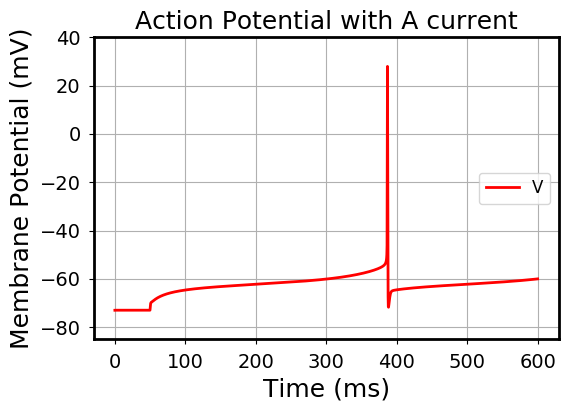

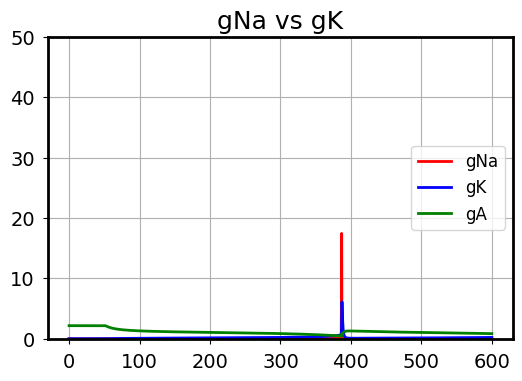

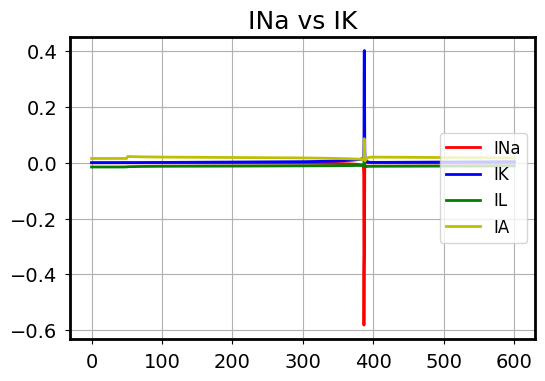

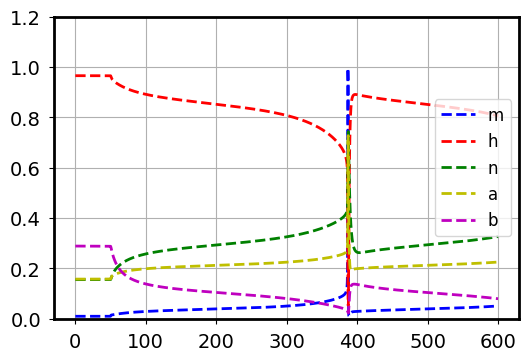

In [15]:
fig = plt.figure()
axes = fig.add_subplot(111)
plt.title('Action Potential with A current')

plt.plot(t, V, 'r-', linewidth=2.0, label="V")
#plt.plot(t, C10[:,0], 'r-', linewidth=2.0, label="V")
#plt.plot(t, C20[:,0], 'r-', linewidth=2.0, label="V")
#axes.set_xlim([6.6,9.3])
axes.set_ylim([-85,40])
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend(loc='center right')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(111)
plt.title('gNa vs gK')
plt.plot(t, gNa, 'r-', linewidth=2.0, label="gNa")
plt.plot(t, gK, 'b-', linewidth=2.0, label="gK")
plt.plot(t, gA, 'g-', linewidth=2.0, label="gA")
#axes.set_xlim([6.6,9.3])
axes.set_ylim([0,50])
plt.legend(loc='center right')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(111)
plt.title('INa vs IK')
plt.plot(t, INa, 'r-', linewidth=2.0, label="INa")
plt.plot(t, IK, 'b-', linewidth=2.0, label="IK")
plt.plot(t, IL, 'g-', linewidth=2.0, label="IL")
plt.plot(t, IA, 'y', linewidth=2.0, label="IA")
#axes.set_xlim([6.6,9.3])
#axes.set_ylim([-50,50])
plt.legend(loc='center right')
plt.show()

fig = plt.figure()
# fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(111)
plt.plot(t, C[:,1], 'b--', linewidth=2.0, label="m")
plt.plot(t, C[:,2], 'r--', linewidth=2.0, label="h")
plt.plot(t, C[:,3], 'g--', linewidth=2.0, label="n")
plt.plot(t, C[:,4]**3, 'y--', linewidth=2.0, label="a")
plt.plot(t, C[:,5], 'm--', linewidth=2.0, label="b")
axes.set_ylim([0,1.2])
#gg = (nK4 / nK4[-1]) *  ((gK[-1] / gK_max)**(1.0/4.0))
# plt.plot(t, INa, 'g--', linewidth=2.0, label="INa")

#plt.plot(t, C[:,2], 'm--', linewidth=2.0, label="ES")
#plt.plot(t, C[:,3], 'b-', linewidth=2.0, label="P")
plt.legend(loc='center right')
plt.show()

In [16]:
def ode_action_potential_NO_A(t, C, p):
    V = C[0]
    m = C[1]
    h = C[2]
    n = C[3]

    
    Iinjected = 0.0
    if p[1] <= t <= p[2]:
        Iinjected = p[0]
    
    ENa     = 50.0     # mV
    gNa_max = 120.0    # mS cm^-2
    EK      = -77.0    # mV
    gK_max  = 20.0     # mS cm^-2
    EL      = -72.8  # -22.0 # mV
    gL_max  = 0.3    # mS cm^-2
    EA      = -80.0    # mV
    gA_max  = 47.7   # mS cm^-2
    Cm      = 1.0    # microF cm^-2

   
    
    Temp = 3.8
    a_m = Temp * 0.1 * (V + 34.7) / (1 - np.exp(-(V + 34.7) / 10))
    b_m = Temp * 4.0 * np.exp(-(V + 59.7) / 18)
    a_h = Temp * 0.07 * np.exp(-(V + 53) / 20)
    b_h = Temp * 1.0 / (1.0 + np.exp(-(V + 23) / 10)) 
    
    a_n = (Temp/2)* 0.010 * (V + 50.7) / (1 - np.exp(-(V + 50.7) / 10) )
    b_n = (Temp/2)* 0.125 * np.exp(-(V + 60.7) / 80)
   
    
    dmdt = a_m * (1 - m) - b_m * m
    dhdt = a_h * (1 - h) - b_h * h
    dndt = a_n * (1 - n) - b_n * n
    
    
    gNa = gNa_max * h * (m**3.0)
    INa = gNa * (V - ENa)
    gK = gK_max * n**4.0
    IK = gK * (V - EK)
    IL = gL_max * (V - EL)
   
    
    dVdt = (-1.0 / Cm) * (INa + IK + IL + Iinjected) 
    
    return (dVdt, dmdt, dhdt, dndt)


In [17]:
# Conductance
Vrest   = -73    # mV
Vstep   = Vrest + 0  # mV
ENa     = 50.0     # mV
gNa_max = 120.0    # mS cm^-2
EK      = -77.0    # mV
gK_max  = 20.0     # mS cm^-2
EL      = -72.8  # -22.0 # mV
gL_max  = 0.3    # mS cm^-2
EA      = -80.0    # mV
gA_max  = 47.7   # mS cm^-2
Cm      = 1.0    # microF cm^-2
Iinj    = -7.83   # 10^-3 mA cm^-2
tini_inj= 50    # ms
tend_inj= 600    # ms

# Define a_n(V) and b_n(V) parameters for K ion channel
V = Vrest


#print a_inf, b_inf, tau_a, tau_b, alpha_a, beta_a, a0, alpha_b, beta_b, b0

Temp = 3.8
a_m = Temp * 0.1 * (V + 34.7) / (1 - np.exp(-(V + 34.7) / 10))
b_m = Temp * 4.0 * np.exp(-(V + 59.7) / 18)
m0 = a_m / (a_m + b_m)
a_h = Temp * 0.07 * np.exp(-(V + 53) / 20)
b_h = Temp * 1.0 / (1.0 + np.exp(-(V + 23) / 10)) 
h0 = a_h / (a_h + b_h)
a_n = (Temp/2)* 0.010 * (V + 50.7) / (1 - np.exp(-(V + 50.7) / 10) )
b_n = (Temp/2)* 0.125 * np.exp(-(V + 60.7) / 80)
n0  = a_n / (a_n + b_n)

#print m0, h0, n0

# Pack up the parameters and initial conditions:
#     S, E, ES, P
C0 = [Vstep, m0, h0, n0]
K  = [Iinj, tini_inj, tend_inj]

# time in ms
t = np.linspace(0,600,2000)

# ODE solver parameters
abserr = 1.0e-8
relerr = 1.0e-6

C = odeint(ode_action_potential_NO_A, C0, t, args=(K,), tfirst=True)

V = C[:,0]  # mV
gNa = gNa_max * C[:,2] * (C[:,1]**3.0) # mS cm^-2
gK = gK_max * C[:,3]**4.0              # mS cm^-2

INa = gNa * (V - ENa) * (10**-3.0)  # mA cm^-2
IK = gK * (V - EK) * (10**-3.0)     # mA cm^-2
IL = gL_max * (V - EL) * (10**-3.0) # mA cm^-2


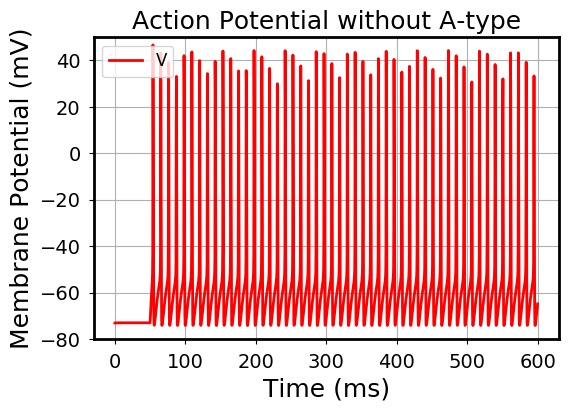

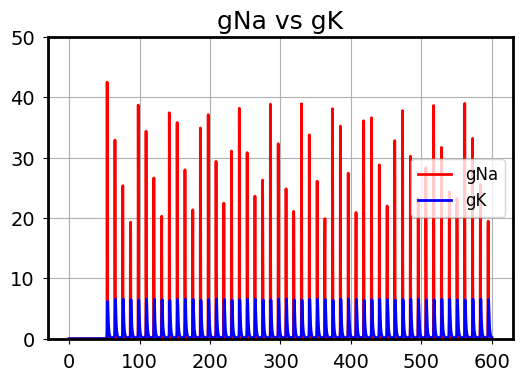

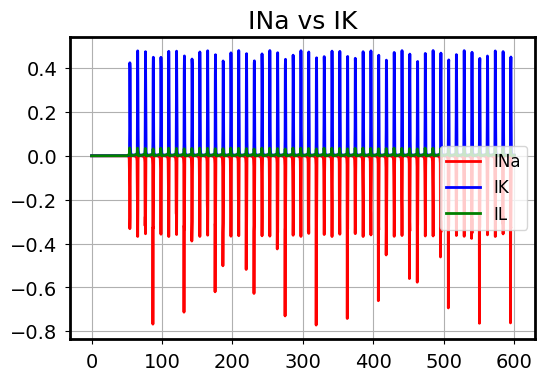

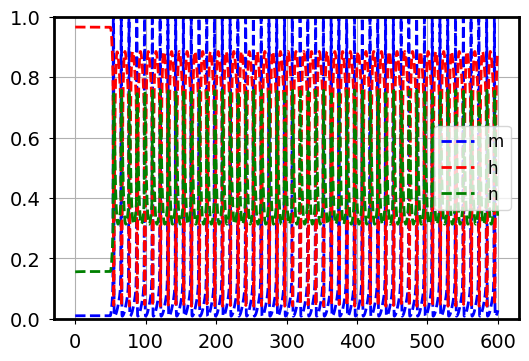

In [18]:
fig = plt.figure()
axes = fig.add_subplot(111)
plt.title('Action Potential without A-type')

plt.plot(t, V, 'r-', linewidth=2.0, label="V")
#plt.plot(t, C10[:,0], 'r-', linewidth=2.0, label="V")
#plt.plot(t, C20[:,0], 'r-', linewidth=2.0, label="V")
#axes.set_xlim([6.6,9.3])
axes.set_ylim([-80,50])
plt.xlabel('Time (ms)')
plt.ylabel('Membrane Potential (mV)')
plt.legend(loc='upper left')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(111)
plt.title('gNa vs gK')
plt.plot(t, gNa, 'r-', linewidth=2.0, label="gNa")
plt.plot(t, gK, 'b-', linewidth=2.0, label="gK")
#axes.set_xlim([6.6,9.3])
axes.set_ylim([0,50])
plt.legend(loc='center right')
plt.show()

fig = plt.figure()
axes = fig.add_subplot(111)
plt.title('INa vs IK')
plt.plot(t, INa, 'r-', linewidth=2.0, label="INa")
plt.plot(t, IK, 'b-', linewidth=2.0, label="IK")
plt.plot(t, IL, 'g-', linewidth=2.0, label="IL")
#axes.set_xlim([6.6,9.3])
#axes.set_ylim([-50,50])
plt.legend(loc='center right')
plt.show()

fig = plt.figure()
# fig = plt.figure(figsize=(8,6))
axes = fig.add_subplot(111)
plt.plot(t, C[:,1], 'b--', linewidth=2.0, label="m")
plt.plot(t, C[:,2], 'r--', linewidth=2.0, label="h")
plt.plot(t, C[:,3], 'g--', linewidth=2.0, label="n")
axes.set_ylim([0,1])
#gg = (nK4 / nK4[-1]) *  ((gK[-1] / gK_max)**(1.0/4.0))
# plt.plot(t, INa, 'g--', linewidth=2.0, label="INa")

#plt.plot(t, C[:,2], 'm--', linewidth=2.0, label="ES")
#plt.plot(t, C[:,3], 'b-', linewidth=2.0, label="P")
plt.legend(loc='center right')
plt.show()

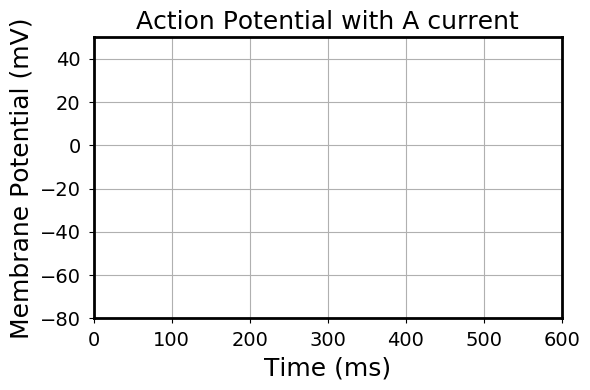

In [31]:
import matplotlib.animation as animation 
from IPython.display import HTML

fig = plt.figure() 
ax = plt.axes(xlim=(0, 600), ylim=(-80, 50)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 

# lists to store x and y axis points 
xdata, ydata = [], [] 

# animation function 
def animate(i): 

    # appending new points to x, y axes points list 
    xdata.append(t[i]) 
    ydata.append(V_A[i]) 
    line.set_data(xdata,ydata)

    #line.set_data(t, V_A) 
    return line,

# setting a title for the plot 
plt.title('Action Potential with A current') 
# axis details 
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.tight_layout()
plt.axis('on') 

# call the animator
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=2000, interval=0.5) 


anim.save('Action_Potential.mp4',writer='ffmpeg', fps=500, dpi=120) 

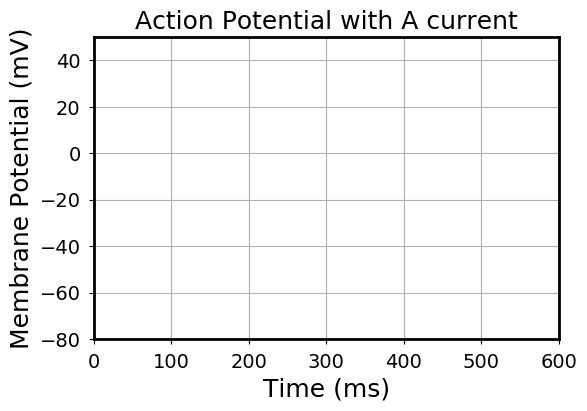

In [20]:
fig = plt.figure() 
ax = plt.axes(xlim=(0, 600), ylim=(-80, 50)) 
line, = ax.plot([], [], lw=2)
plt.title('Action Potential with A current') 
# axis details 
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.axis('on')
plt.show()

In [33]:
HTML(anim.to_html5_video())

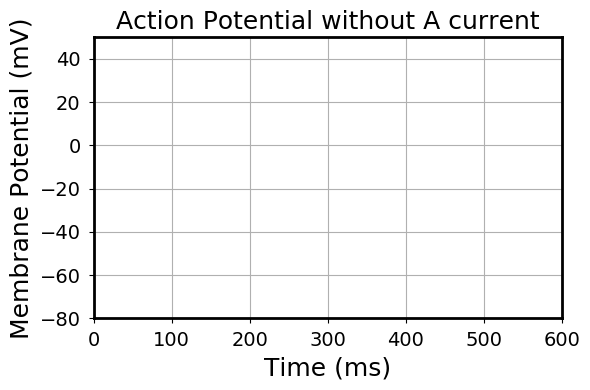

In [34]:
#@title Default title text
fig = plt.figure() 
ax = plt.axes(xlim=(0, 600), ylim=(-80, 50)) 
line, = ax.plot([], [], lw=2) 

# initialization function 
def init(): 
	# creating an empty plot/frame 
	line.set_data([], []) 
	return line, 

# lists to store x and y axis points 
xdata_wo, ydata_wo = [], [] 

# animation function 
def animate(i): 
    
    # appending new points to x, y axes points list 
    xdata_wo.append(t[i]) 
    ydata_wo.append(V[i]) 
    line.set_data(xdata_wo,ydata_wo)
    #print t[i]
    #line.set_data(t, V_A) 
    return line,

# setting a title for the plot 
plt.title('Action Potential without A current') 
# axis details 
plt.xlabel("Time (ms)")
plt.ylabel("Membrane Potential (mV)")
plt.tight_layout()
plt.axis('on') 

# call the animator
anim2 = animation.FuncAnimation(fig, animate, init_func=init, frames=2000, interval=0.5) 


anim2.save('NO_A_Action_Potential.mp4',writer='ffmpeg', fps=500, dpi=120) 

In [35]:
HTML(anim2.to_html5_video())